In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
raw_data_frame = pd.read_csv(r"D:\\projectSpace\\AI_Project\\raw_data_30m\\GBPJPY_M30.csv", sep='\t')

In [12]:
raw_data_frame

,Time,Open,High,Low,Close,Volume
0,2007-02-05 04:30:00,236.609,236.667,236.410,236.522,1489
1,2007-02-05 05:00:00,236.534,236.559,236.276,236.281,1590
2,2007-02-05 05:30:00,236.280,236.648,236.132,236.468,1711
3,2007-02-05 06:00:00,236.461,236.480,236.175,236.253,1546
4,2007-02-05 06:30:00,236.242,236.273,235.949,236.109,1474
...,...,...,...,...,...,...
199995,2023-02-10 13:00:00,158.498,158.626,158.465,158.555,2379
199996,2023-02-10 13:30:00,158.553,158.590,158.478,158.484,2185
199997,2023-02-10 14:00:00,158.480,158.527,158.412,158.450,2411
199998,2023-02-10 14:30:00,158.449,158.462,158.370,158.426,1599


In [15]:
# dataframe for close price to calculate 200 ema
close_price = raw_data_frame.drop(['Time', 'Open', 'High', 'Low', 'Volume'], axis=1)


In [17]:
# calculating 200 ema using ewm method in pd
def calculate_ema_200(data, n):
    ema = data.Close.ewm(span=n, adjust=False).mean()
    return ema
ema_200 = calculate_ema_200(close_price, 200)


In [20]:
ema_200 = ema_200.round(3)
ema_200

0         236.522
1         236.520
2         236.519
3         236.516
4         236.512
           ...   
199995    158.762
199996    158.759
199997    158.756
199998    158.753
199999    158.750
Name: Close, Length: 200000, dtype: float64

In [21]:
# making final dataframe with close price, 200 ema, volume
final_data_frame = raw_data_frame.drop(['Time', 'Open', 'High', 'Low'], axis=1)
final_data_frame['ema_200'] = ema_200


In [22]:
final_data_frame

,Close,Volume,ema_200
0,236.522,1489,236.522
1,236.281,1590,236.520
2,236.468,1711,236.519
3,236.253,1546,236.516
4,236.109,1474,236.512
...,...,...,...
199995,158.555,2379,158.762
199996,158.484,2185,158.759
199997,158.450,2411,158.756
199998,158.426,1599,158.753


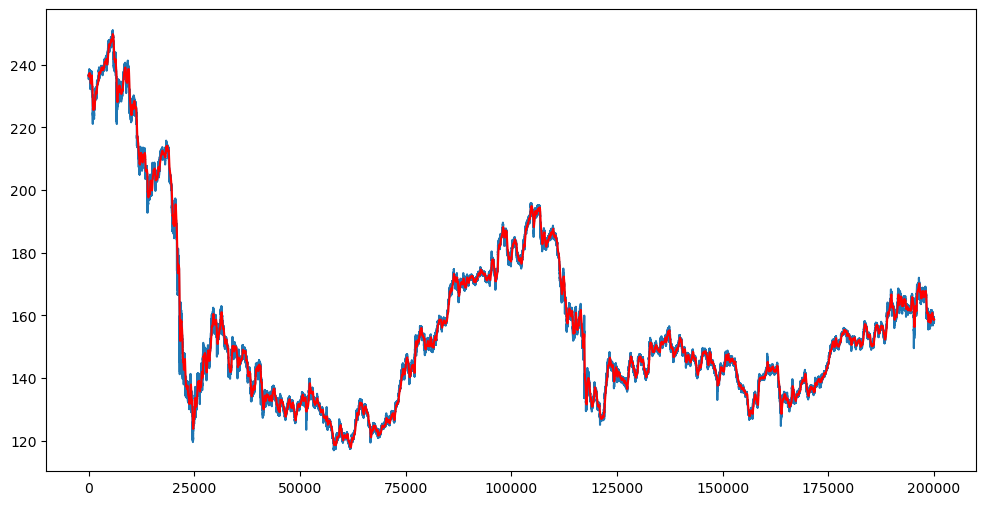

In [23]:
plt.figure(figsize=(12,6))
plt.plot(final_data_frame.Close)
plt.plot(final_data_frame.ema_200, 'r')


In [30]:
# making a Trend column for binary classification of the trend so as to decrease noise  
final_data_frame['Trend'] = [1 if row['Close'] > row['ema_200'] + 0.001 * row['Close']
                        else -1 if row['Close'] < row['ema_200'] - 0.001 * row['Close']
                        else 0 for index, row in final_data_frame.iterrows()]


In [29]:
final_data_frame

,Close,Volume,ema_200,Trend
0,236.522,1489,236.522,0
1,236.281,1590,236.520,-1
2,236.468,1711,236.519,0
3,236.253,1546,236.516,-1
4,236.109,1474,236.512,-1
...,...,...,...,...
199995,158.555,2379,158.762,-1
199996,158.484,2185,158.759,-1
199997,158.450,2411,158.756,-1
199998,158.426,1599,158.753,-1


In [31]:
final_data_frame.to_csv(r"D:\\projectSpace\\AI_Project\\pre_precessed_data\\"+'GBPJPY_M30.csv')

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib

In [34]:
# splitting data into features x and labels y
x = final_data_frame[['Close', 'Volume', 'ema_200']]
y = final_data_frame['Trend']

In [35]:
# making traing and testing dataframes with 80 20 ratio, and random state 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
# training the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train) 

In [ ]:
# accuracy
model_acc = dt_classifier.score(x_test, y_test)
print('Acc = ', model_acc)


In [ ]:
model = dt_classifier
joblib.dump(model, 'model.joblib')
